# Probabilistic Localization

Implements markov localization as in the example in Chapter 8 of "Elements of Robotics" (free download at http://elementsofrobotics.epfl.ch/)

## World definition
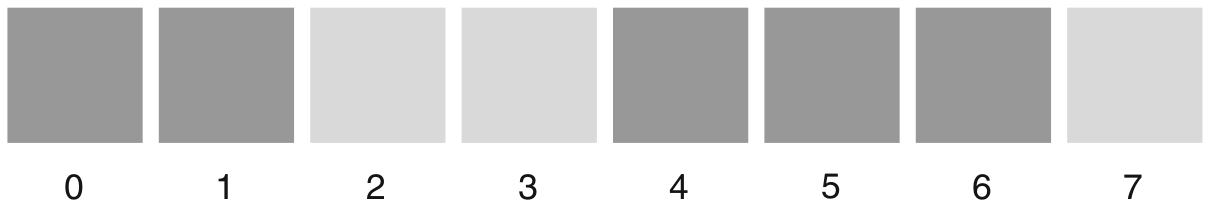



In [25]:
import numpy as np

#  Initial belief array:
#    uniform distribution of the robot's location
def uniform():
    return np.ones(8)/8

#  There are doors at positions 0,1,4,5,6
doors = np.array([True, True, False, False, True, True, True, False])


#  Uncertainty in motion:
#    [Remains in place, moves 1 position right, moves 2 positions right
q = np.array([.1, .8, .1])

#  Move belief array a right (cyclic)
def move_right(a):
    temp = a[len(a)-1];
    for i in reversed(range(1, len(a))):
        a[i] = a[i-1]
    a[0] = temp
    return a

#  Move belief array a right (cyclic) with uncertaity of motion q
def move_right_uncertain(a):
    temp1 = a[len(a)-1];
    temp2 = a[len(a)-2];
    for i in reversed(range(1, len(a))):
        a[i] = a[i]*q[0] + a[i-1]*q[1] + a[i-2]*q[2]
    a[0] = a[0]*q[0] + temp1*q[1] + temp2*q[2]
    return a

#  Move belief array a right (cyclic) with uncertaity of motion q
def move_right_unc(a):
    ret = np.zeros(len(p))
    for i in range(len(q)):
        ret += q[i] * np.roll(a,i)
    assert(sum(a) == 1.0)
    return ret

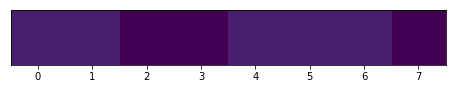

In [21]:
import matplotlib.pyplot as plt
def viz(a):
    fig,ax = plt.subplots(figsize=(8,1))
    ax.imshow(a[np.newaxis,:],vmin=0,vmax=1)
    ax.set(yticks=[],
           xticks=range(len(a)))
viz(b)

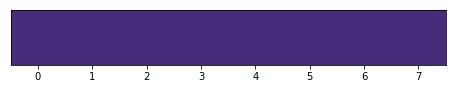

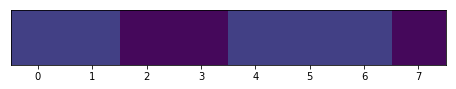

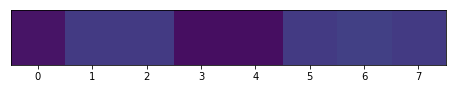

In [28]:
#  Print out tables
#  Initialize belief array b with uniform distribution
b = uniform()
viz(b)
b = b*p
b = b/sum(b)
viz(b)
b = move_right_unc(b)
viz(b)

In [2]:
#  Three moves of the robot:
#  Mulitply by probability, normalize, move right
print ("Sensors with uncertainty, move without uncertainty")
for i in range(3):
    b = multiply_prob(b)
    print_array("multiply ", b)
    b = normalize(b)
    print_array("norm     ", b)
    b = move_right(b)
    print_array("right    ", b)
    print ()

#  Three moves of the robot:
#  Mulitply by probability, normalize, move right with uncertainty
print ("Sensors with uncertainty, move with uncertainty")
for i in range(3):
    b = multiply_prob(b)
    print_array("multiply ", b)
    b = normalize(b)
    print_array("norm     ", b)
    b = move_right_uncertain(b)
    print_array("right    ", b)
    print ()

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
Sensors with uncertainty, move without uncertainty
multiply 0.11 0.11 0.01 0.01 0.11 0.11 0.11 0.01 
norm     0.19 0.19 0.02 0.02 0.19 0.19 0.19 0.02 
right    0.02 0.19 0.19 0.02 0.02 0.19 0.19 0.19 

multiply 0.02 0.17 0.02 0.0 0.02 0.17 0.17 0.02 
norm     0.03 0.29 0.03 0.0 0.03 0.29 0.29 0.03 
right    0.03 0.03 0.29 0.03 0.0 0.03 0.29 0.29 

multiply 0.03 0.03 0.03 0.0 0.0 0.03 0.26 0.03 
norm     0.07 0.07 0.07 0.01 0.01 0.07 0.63 0.07 
right    0.07 0.07 0.07 0.07 0.01 0.01 0.07 0.63 

Sensors with uncertainty, move with uncertainty
multiply 0.06 0.06 0.01 0.01 0.01 0.01 0.06 0.06 
norm     0.23 0.23 0.02 0.02 0.02 0.02 0.22 0.23 
right    0.23 0.22 0.21 0.04 0.02 0.02 0.04 0.2 

multiply 0.2 0.2 0.02 0.0 0.02 0.02 0.04 0.02 
norm     0.38 0.38 0.04 0.01 0.04 0.04 0.08 0.04 
right    0.08 0.35 0.34 0.07 0.01 0.04 0.05 0.07 

multiply 0.07 0.31 0.03 0.01 0.01 0.03 0.04 0.01 
norm     0.13 0.6 0.07 0.01 0.03 0.07 0.08 0.01 